# Rekrutacja - Koło Naukowe Data Science PW - Filip Pazio

## Opis projektu

Celem projektu jest zaimplementowanie algorytmu na znajdowanie najkrótszej ścieżki w grafie. W tej pracy skorzystam z algorytmu Dijkstry oraz porównam moją implementację algorytmu z już istniejącą.


W projekcie będe zakładał, że rozpatrywane grafy są spójne i nieskierowane.

## Algorytm Dijkstry


*   Tworzymy pusty graf będący drzewem, w którym każda ścieżka, wychodząca z wierzchołka uznawawnego za źródło, będzie najkrótszą ścieżką łączącą jej końcowy wierzchołek ze źródłem. Dodajemy do tego grafu źródło.
*   Przypisujemy źródłu odległość równą 0, wierzchołkom sąsiadującym ze źródłem przypisujemy odległości równe wagom krawędzi łączących je ze źródłem, a pozostałym wierzchołkom przypisujemy odległość nieskończoną.
*   Wybieramy nienależący do drzewa wierzchołek o najmniejszej odległości odległości od źródła. Dodajemy go dodrzewa i sprawdzamy czy nie prowadzi przez niego krótsza ścieżka do jednego z wierzchołków z nim sąsiadujących. Jeśli tak, to aktualizujemy odległość tego wierzchołka.
*   Powtarzamy ostatni krok do momentu, gdy do drzewa będą należeć wszystkie wierzchołki grafu.




## Zadanie

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Zacznijmy od zobaczenia grafu podanego jako przykład w treści zadania:

In [2]:
def plot_graf(graf, seed):
  G = nx.Graph()
  for i in graf:
    G.add_edge(i[0], i[1], weight=graf[i])

  pos = nx.spring_layout(G, seed=seed)
  nx.draw_networkx(G,pos, arrows=None, with_labels=True)
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

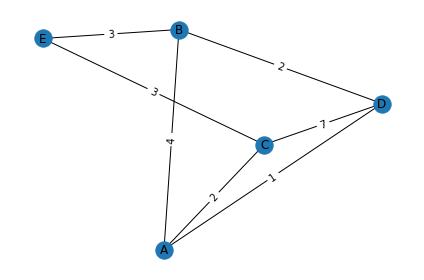

In [3]:
graf = {
  ("B", "D"): 2,
  ("D", "A"): 1,
  ("B", "A"): 4,
  ("A", "C"): 2,
  ("B", "E"): 3,
  ("C", "D"): 7,
  ("E", "C"): 3
} 

plot_graf(graf, seed=4)

## Moja wersja implementacji algorytmu

Funkcja pomocnicza, dzięki której wybierana zostaje tylko jedna ścieżka w razie gdy jest kilka najkrótszych ścieżek:

In [4]:
def mmin(L,ids):
  min = np.inf
  for i in range(len(L)):
    if min > L[i] and i not in ids:
      min = L[i]
      min_id = i
  return min_id

Główny kod mojej wersji algorytmu:

In [5]:
def my_path(graf, n1, n2):
  ids = [] # tworze liste indeksow wierzcholkow grafu
  for i in graf:
    for j in [0,1]:
      if i[j] not in ids:
        ids.append(i[j])
  
  V = np.zeros((len(ids),len(ids))) # powstaje macierzowa reprezentacja krawedzi grafu
  for i in graf:
    V[ids.index(i[0]),ids.index(i[1])] = graf[i]
    V[ids.index(i[1]),ids.index(i[0])] = graf[i]
  
  paths =[[n1] for i in range(len(ids))] # inicjujemy liste wszystkich najkrótszych sciezek 
  # (odpowiednik drzewa z algorytmu Dijkstry)
  
  # Algorytm Dijkstry
  # krok 1
  start = ids.index(n1)
  vistd = []
  vistd.append(start)
  dists = np.ones(len(ids))*np.inf
  dists[start] = 0
  for i in range(len(ids)):
    if V[start][i] != 0:
      dists[i] = V[start][i]
      paths[i].append(ids[i])
   
  # nastepne kroki
  end = True 
  while end:
    id = mmin(dists, vistd)
    if id == n2: break # przerywamy dzialanie algorytmu w momencie gdy znajdziemy najkrotsza sciezke do interesujacego nas wierzcholka
    vistd.append(id)
    vistd.sort() # sortujemy by moc sprawdzic czy odwiedzilismy juz wszystko
    for i in range(len(ids)):
      if V[id][i] != 0:
        if dists[id] + V[id][i] < dists[i]:
          dists[i] = dists[id] + V[id][i] # w tym momencie zliczane sa koszty
          paths[i] = paths[id].copy() # aktualizujemy sciezke do obecnie najkrotszej do danego punktu
          paths[i].append(ids[i]) 
    end = vistd != [*range(len(ids))] # warunek sprawdzający czy należy już opuścić pętle
  
  # algorytm Dijkstry zwraca nam wszystkie najkrotsze sciezki z punktu n1 oraz ich koszty
  # wybieramy z nich ta jedna ktora nas interesuje 

  return paths[ids.index(n2)], dists[ids.index(n2)] # zwracamy sciezke oraz koszt tej sciezki


In [6]:
my_path(graf,'A','E')

(['A', 'C', 'E'], 5.0)

## Istniejący pakiet Dijsktar

In [7]:
!pip install dijkstar
from dijkstar import Graph, find_path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Funkcja szukająca najkrótszej ścieżki z wykorzystaniem pakietu Dijkstar:

In [8]:
def dijkstar_path(graf, n1, n2):
  graph = Graph()
  for i in graf:
    graph.add_edge(i[0], i[1], graf[i])
    graph.add_edge(i[1], i[0], graf[i])

  return(find_path(graph, n1, n2))

In [9]:
dijkstar_path(graf,'A','E')

PathInfo(nodes=['A', 'C', 'E'], edges=[2, 3], costs=[2, 3], total_cost=5)

## Porównanie

In [10]:
import timeit

In [11]:
def testtime(n,graf,n1,n2):
  wynik_d = timeit.timeit(stmt=f"dijkstar_path({graf},'{n1}','{n2}')", globals=globals(), number=n)
  wynik_m = timeit.timeit(stmt=f"my_path({graf},'{n1}','{n2}')", globals=globals(), number=n)


  print(f"Wynik średni dla Dijkstar to {wynik_d / n} sekundy.")
  print(f"Wynik średni dla mojej implementacji to {wynik_m / n} sekundy.")
  print(f"Mój algorytm, średnio, jest {wynik_m / wynik_d} razy wolniejszy.")

In [12]:
def testpath(graf,n1,n2):
  print(f"Ścieżka znaleziona przez Disjktar to {dijkstar_path(graf,n1,n2)[0]} o koszcie {dijkstar_path(graf,n1,n2)[3]}.")
  print(f"Ścieżka znaleziona przez moją implementacje to {my_path(graf,n1,n2)[0]} o koszcie {my_path(graf,n1,n2)[1]}.")

Dla grafu z treści zadania algorytmy zachowują się w następujący sposób:

In [13]:
testtime(10, graf, 'A', 'B')
testpath(graf, 'A', 'B')

Wynik średni dla Dijkstar to 5.847610000273562e-05 sekundy.
Wynik średni dla mojej implementacji to 0.0001497478000146657 sekundy.
Mój algorytm, średnio, jest 2.5608376756941764 razy wolniejszy.
Ścieżka znaleziona przez Disjktar to ['A', 'D', 'B'] o koszcie 3.
Ścieżka znaleziona przez moją implementacje to ['A', 'D', 'B'] o koszcie 3.0.


Testy dla innych grafów:

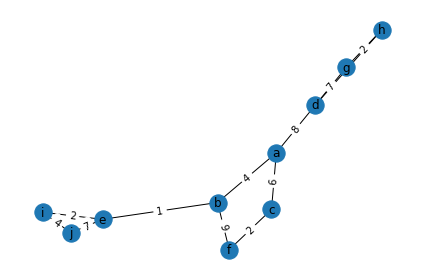

In [14]:
graf1 = {('a', 'b'): 4, ('a', 'c'): 6, ('a', 'd'): 8, ('b', 'e'): 1 ,
      ('b', 'f'): 9, ('c', 'f'): 2, ('d', 'g'): 7, ('d', 'h'): 1 ,
      ('e', 'i'): 2, ('e', 'j'): 7, ('g', 'h'): 2, ('i', 'j'): 4}

plot_graf(graf1,seed=8)

In [15]:
testtime(100, graf1, 'j', 'c')
testpath(graf1, 'j', 'c')

Wynik średni dla Dijkstar to 0.00012591720999807876 sekundy.
Wynik średni dla mojej implementacji to 0.0004348754000011468 sekundy.
Mój algorytm, średnio, jest 3.453661338333196 razy wolniejszy.
Ścieżka znaleziona przez Disjktar to ['j', 'i', 'e', 'b', 'a', 'c'] o koszcie 17.
Ścieżka znaleziona przez moją implementacje to ['j', 'i', 'e', 'b', 'a', 'c'] o koszcie 17.0.


In [16]:
testtime(100, graf1, 'i', 'h')
testpath(graf1, 'i', 'h')

Wynik średni dla Dijkstar to 0.00016745091999837314 sekundy.
Wynik średni dla mojej implementacji to 0.0003973102600002676 sekundy.
Mój algorytm, średnio, jest 2.3726967878356695 razy wolniejszy.
Ścieżka znaleziona przez Disjktar to ['i', 'e', 'b', 'a', 'd', 'h'] o koszcie 16.
Ścieżka znaleziona przez moją implementacje to ['i', 'e', 'b', 'a', 'd', 'h'] o koszcie 16.0.


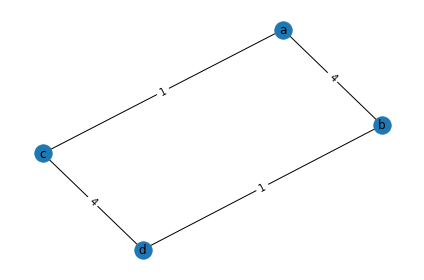

In [17]:
graf2 = {('a', 'b'): 4, ('a', 'c'): 1, ('c', 'd'): 4, ('b', 'd'): 1}

plot_graf(graf2,seed=8)

In [18]:
testtime(100, graf2, 'a', 'd')
testpath(graf2, 'a', 'd')

Wynik średni dla Dijkstar to 3.362845000083325e-05 sekundy.
Wynik średni dla mojej implementacji to 6.0502979999910166e-05 sekundy.
Mój algorytm, średnio, jest 1.7991605321806687 razy wolniejszy.
Ścieżka znaleziona przez Disjktar to ['a', 'c', 'd'] o koszcie 5.
Ścieżka znaleziona przez moją implementacje to ['a', 'c', 'd'] o koszcie 5.0.


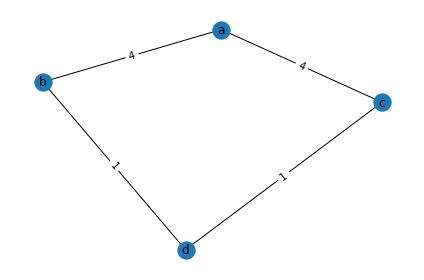

In [19]:
graf3 = {('a', 'b'): 4, ('a', 'c'): 4, ('c', 'd'): 1, ('b', 'd'): 1}

plot_graf(graf3,seed=3)

In [20]:
testtime(100, graf3, 'a', 'd')
testpath(graf3, 'a', 'd')

Wynik średni dla Dijkstar to 5.4515010001523477e-05 sekundy.
Wynik średni dla mojej implementacji to 0.00010060412000257202 sekundy.
Mój algorytm, średnio, jest 1.8454388983834091 razy wolniejszy.
Ścieżka znaleziona przez Disjktar to ['a', 'b', 'd'] o koszcie 5.
Ścieżka znaleziona przez moją implementacje to ['a', 'b', 'd'] o koszcie 5.0.


## Wniosek

Pakiet Dijkstar wykorzystuje listy sąsiedztwa do reprezantacji grafu, co powoduje, że jest on bardziej optymalny niż mój algorytm, korzystający z reprezentacji grafów w postaci macierzy. Dodatkowo, pozwala on na tworzenie w prosty sposób dynamicznych funkcji kosztów ścieżek.

## Bibliografia


*   https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
*   https://pypi.org/project/Dijkstar/
*   https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/
*   https://stackoverflow.com/questions/50119106/converting-a-graph-into-dictionary-form - źródło dla graf1

